The goal of the this dataset : to predict **seven different cover types in four different wilderness areas** of the Roosevelt National Forest of Northern Colorado with the best accuracy.

Four wilderness areas are:
-  Rawah （比恩维尔国家森林）
- Neota （渥太华国家森林）
- Comanche Peak （圣伊莎贝尔国家森林）
- Cache la Poudre （科林斯堡国家森林）

Seven categories numbered from 1 to 7 in the Cover_Type column, to be classified:
- Spruce/Fir （云杉/冷杉）
- Lodgepole Pine （美国某种杉）
- Ponderosa Pine （黄松）
- Cottonwood/Willow （杨木/柳树）
- Aspen （白杨）
- Douglas-fir （道格拉斯冷杉）
- Krummholz （德国来的树？）

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

import numpy as np

mlp.rc('xtick', labelsize=16) 
mlp.rc('ytick', labelsize=16) 
plt.rc('axes', titlesize=16)   
plt.rc('axes', labelsize=16) 

# Load raw data

In [2]:
Train_data = pd.read_csv("data/train.csv", index_col=[0])
print("the shape of data is ", Train_data.shape)
Train_data.head()

the shape of data is  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


This dataset has 54 attributes (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)

The last column is the label for each data point

**10 quantitative variables**
- Elevation - Elevation (海拔） in meters
- Aspect - Aspect in degrees azimuth （方位角方面）
- Slope - Slope in degrees （坡度）
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features 距离最近的地表水的水平距离
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features 距离最近的地表水的垂直距离
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway 距离最近的公路的水平距离
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice 夏至上午9点的Hillshade索引
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice  夏至中午的Hillshade索引
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice 夏至下午3点的Hillshade索引
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points 距离最近着火点的水平距离

**4 binary wilderness areas** （已经onehot encoding了）
- Rawah Wilderness Area
- Neota Wilderness Area
- Comanche Peak Wilderness Area
- Cache la Poudre Wilderness Area

**40 binary soil type**
- 40种看不懂的岩石，也已经onehot encoding了

In [3]:
# Train_data.info()
# Train_data.describe()

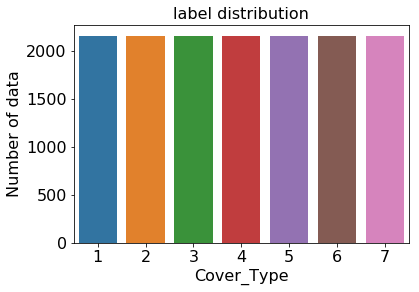

In [4]:
sns.barplot(x=[1,2,3,4,5,6,7],y=Train_data["Cover_Type"].value_counts().values)
plt.xlabel("Cover_Type")
plt.ylabel("Number of data")
plt.title("label distribution")
plt.show()

All classes have an equal presence. No class re-balancing is necessary

# Data Exploration

- **check NAN values**

In [5]:
print("There are {} NAN in this dataset ".format(Train_data.isnull().values.sum()))

There are 0 NAN in this dataset 


- **check feature distution**

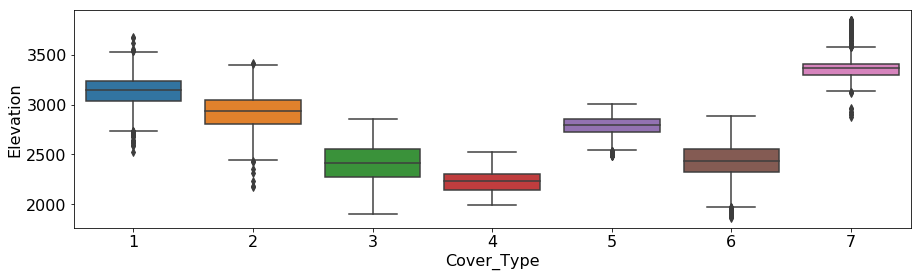

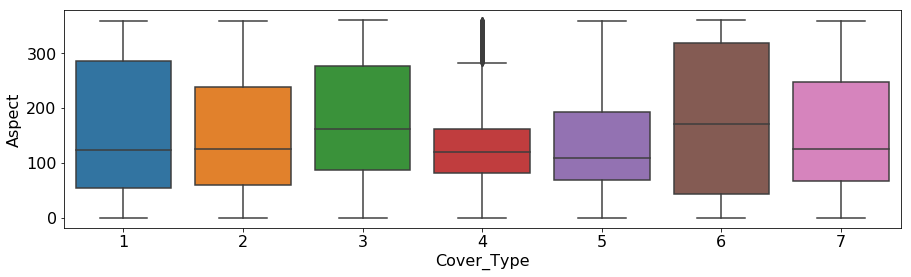

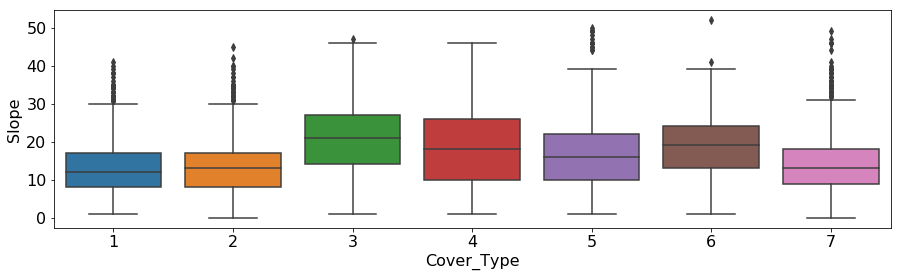

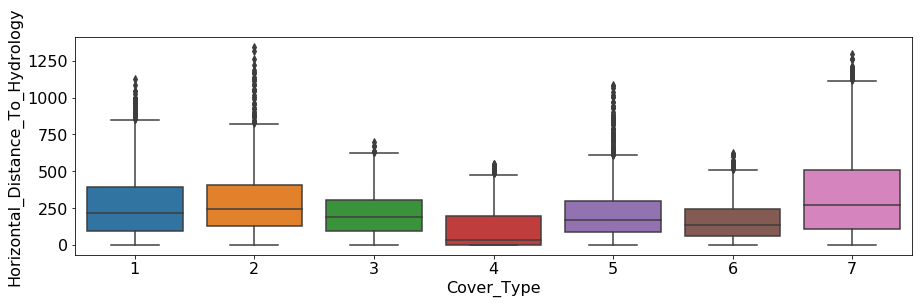

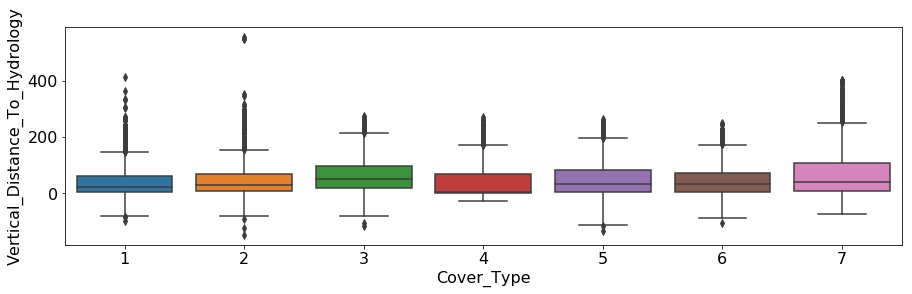

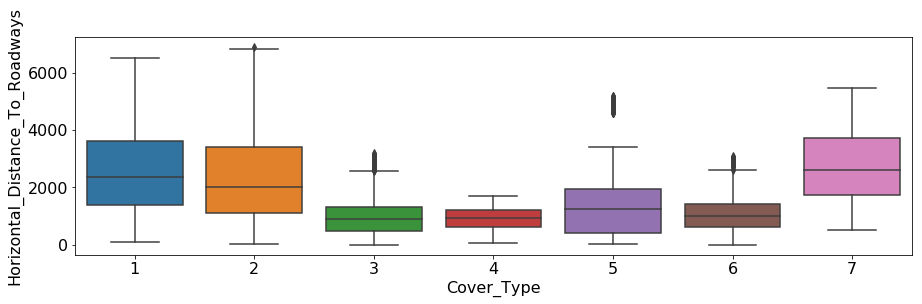

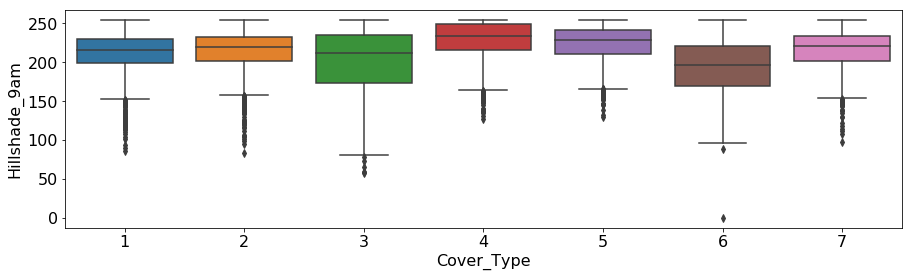

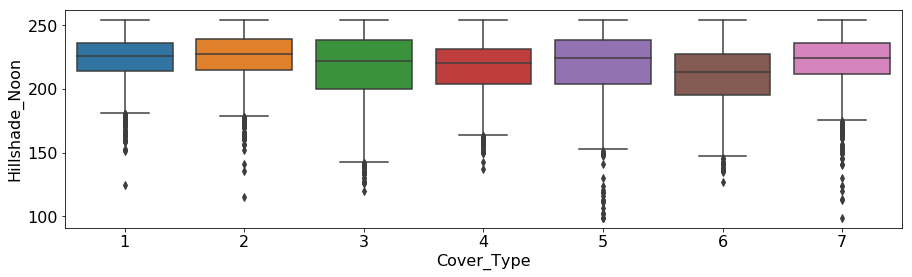

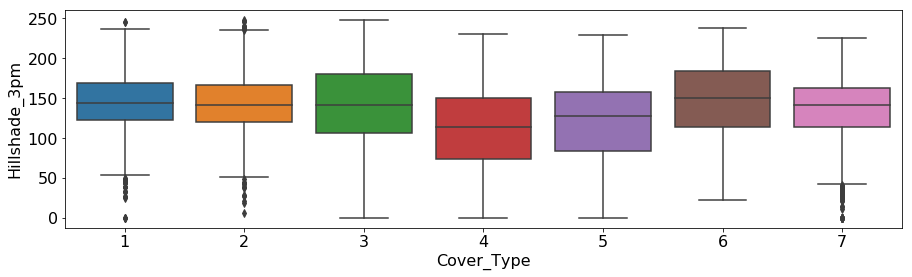

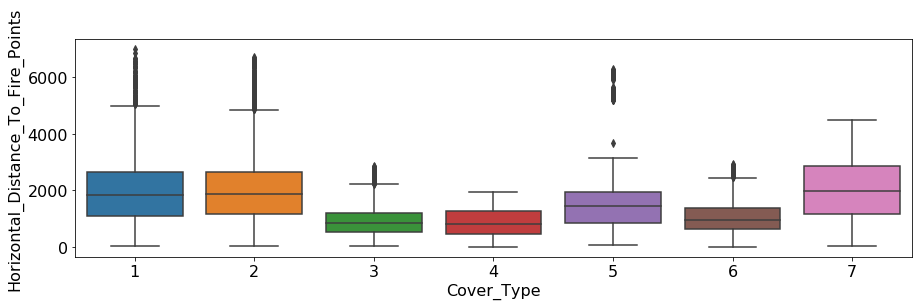

In [6]:
for i in range(10):
    plt.figure(figsize=(15,4))
    sns.boxplot(x="Cover_Type", y=Train_data.columns[i], data=Train_data)
    plt.show()

There are quite a lot of outliers for each feature

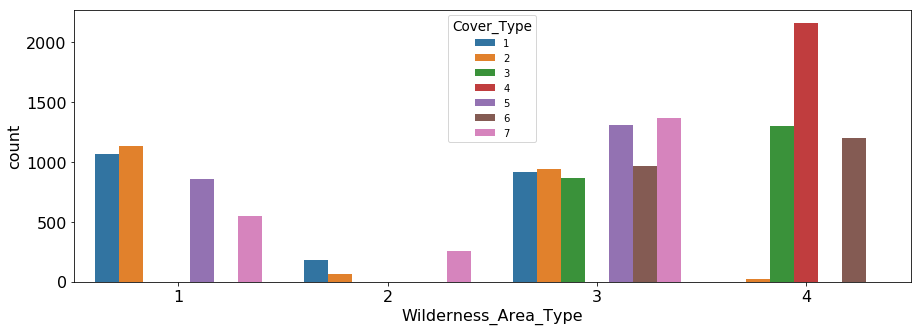

In [7]:
Train_data['Wilderness_Area_Type'] = (Train_data.iloc[:, 10:14] == 1).idxmax(1)
Train_data['Wilderness_Area_Type']= Train_data['Wilderness_Area_Type'].map({'Wilderness_Area1': 1, 'Wilderness_Area2': 2,'Wilderness_Area3': 3,'Wilderness_Area4': 4})
plt.figure(figsize=(15,5))
sns.countplot(x="Wilderness_Area_Type", hue="Cover_Type", data=Train_data)
plt.show()

- **Check correlation**

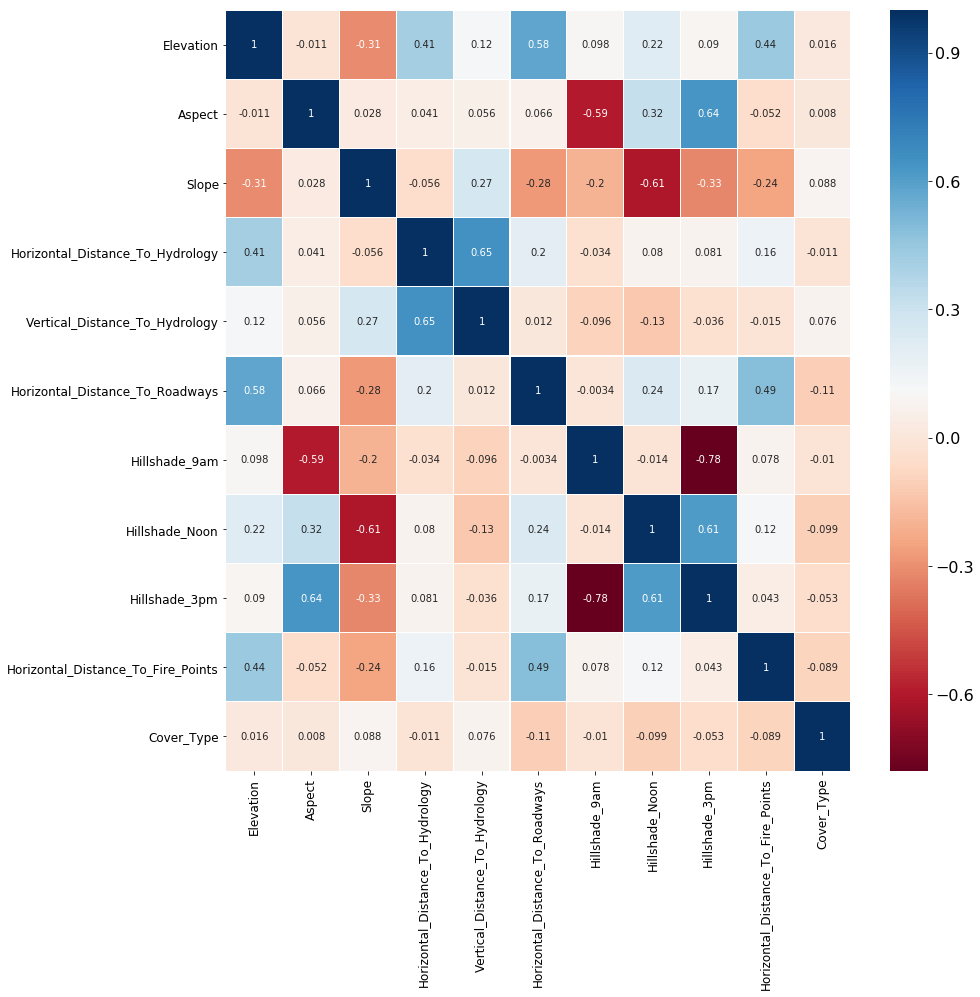

In [8]:
plt.figure(figsize=(14,14))
temp_data = Train_data.iloc[:, :10]
temp_data["Cover_Type"] = Train_data["Cover_Type"]
correlation = temp_data.corr()

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(correlation,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
#plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Distributions:**
* `Hillshade_9am` and `Hillshade_Noon` has bi-modal and left-skewed distributions.
* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology` has bi-modal and right-skewed distributions.
* `Elevation` (height of a fantastic trees) resembles a uniform distribution.
* `Slope`, `Vertical_Distance_To_Hydrology`, `Hillshade_3pm` shows a symmetric and bi-modal distribution.

**Some obvious relationships between the continuous features:**
*  `Elevation` and shows positive trend with following variables:
   * `Vertical_Distance_To_Hydrology`
   * `Horizontal_Distance_To_Roadways`
   * `Horizontal_Distance_To_Firepoints`
   * `Horizontal_Distance_To_Hydrology`
* As `Aspect` increases; `Hillshade_Noon` and `Hillshade_3pm` increases.
* `Slope` has negative trend with:
  * `Elevation`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
  * `Horizontal_Distance_To_Firepoints`
* `Horizontal_Distance_To_Hydrology`  has positive trend with:
  * `Horizontal_Distance_To_Firepoints`
  * `Horizontal_Distance_To_Roadways`
  * `Vertical_Distance_To_Hydrology`
* `Vertical_Distance_To_Hydrology` - `Slope` and `Vertical_Distance_To_Hydrology` - `Horizontal_Distance_To_Hydrology` has obvious collinear relationship.
* As `Horizontal_Distance_To_Roadways` increases, `Horizontal_Distance_To_Firepoints` increases and `Slope` decreases.
* `Hillshade_9am` shows negative trend with `Hillshade_3pm` and `Aspect`, as `Hillshade_9am` increases `Elevation` increases.
* `Hillshade_Noon` has positive trend with:
  * `Elevation`
  * `Aspect`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_3pm` 
  * `Horizontal_Distance_To_Firepoints`
* `Hillshade_3pm` shows perfect negative relationship with `Hillshade_9am` and perfect positive relationship with `Hillshade_Noon`.

**Some Collinear features:**
* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

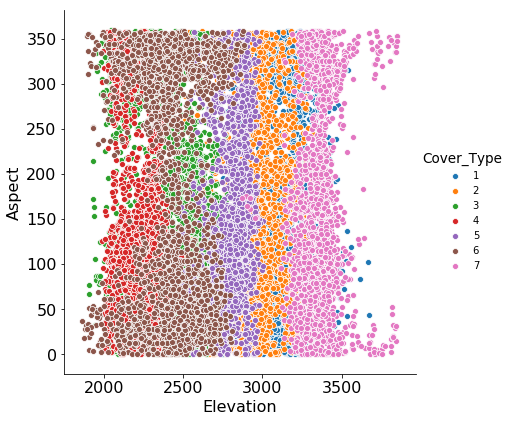

In [9]:
sns.pairplot(Train_data, hue="Cover_Type", size=6, x_vars="Elevation",y_vars="Aspect") 
plt.show()

# Dummy model
    tree based model, no need to do data normalisation

In [10]:
del Train_data["Wilderness_Area_Type"]
Shuffle_data = Train_data.sample(frac=1)
X = Shuffle_data.iloc[:,:-1]
y = Shuffle_data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(boosting_type='gbdt', objective='multiclass')
model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [13]:
prediction = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.84755291005291

In [16]:
feat_importance = pd.DataFrame()
feat_importance["feature"] = Shuffle_data.iloc[:,:-1].columns
feat_importance["value"] = model.feature_importances_
feat_importance.sort_values(by='value', ascending=False, inplace=True)
feat_importance["accumulated_importance"]= feat_importance["value"].cumsum()/feat_importance["value"].sum()

In [17]:
feat_importance

,feature,value,accumulated_importance
0,Elevation,3623,0.172524
5,Horizontal_Distance_To_Roadways,3058,0.318143
9,Horizontal_Distance_To_Fire_Points,2887,0.455619
3,Horizontal_Distance_To_Hydrology,1682,0.535714
4,Vertical_Distance_To_Hydrology,1470,0.605714
6,Hillshade_9am,1140,0.660000
7,Hillshade_Noon,1103,0.712524
1,Aspect,1048,0.762429
8,Hillshade_3pm,982,0.809190
2,Slope,783,0.846476


# Anomaly Detection

In [35]:
from scipy.io import loadmat
data_anomaly = loadmat("data/cover.mat")
Anamaly_df = pd.DataFrame(data_anomaly["X"])
Anamaly_df.columns = Train_data.columns[:10]
Anamaly_df["Cover_type"] = data_anomaly["y"]

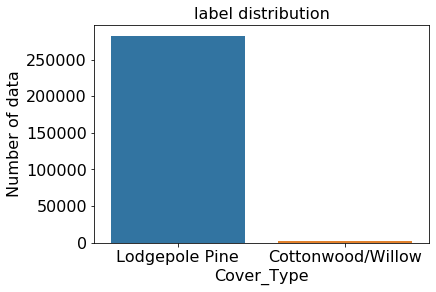

In [47]:
sns.barplot(x=["Lodgepole Pine","Cottonwood/Willow"],y=Anamaly_df["Cover_type"].value_counts().values)
plt.xlabel("Cover_Type")
plt.ylabel("Number of data")
plt.title("label distribution")
plt.show()

 class 0 (original 2) are considered as normal points and instances from class 1 (original 4) are anomalies